# Mamdani Fuzzy Inference Systems
In this tutorial, we are using fuzzy_expert package. For more information about this package and its usage, please see https://jdvelasq.github.io/fuzzy-expert/index.html

In [1]:
!pip install fuzzy_expert

In this tutorial a fuzzy inference system for loan approbation is builded. The problem has three input variables: score, ratio, and credit; and one output variable: decision.

In the following code, a dictionary containing the variables of the problem is defined. The keys of the dictionary are the names of the variables in the rules. For each variable is defined the limits of the universe of discourse, the terms, and the membership function for each term. Finally, the variable score is ploted.

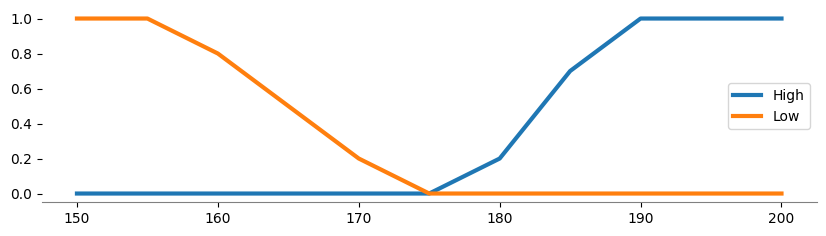

In [2]:
import matplotlib.pyplot as plt
import numpy as np

from fuzzy_expert.variable import FuzzyVariable

variables = {
    "score": FuzzyVariable(
        universe_range=(150, 200),
        terms={
            "High": [(175, 0), (180, 0.2), (185, 0.7), (190, 1)],
            "Low": [(155, 1), (160, 0.8), (165, 0.5), (170, 0.2), (175, 0)],
        },
    ),
    "ratio": FuzzyVariable(
        universe_range=(0.1, 1),
        terms={
            "Goodr": [(0.3, 1), (0.4, 0.7), (0.41, 0.3), (0.42, 0)],
            "Badr": [(0.44, 0), (0.45, 0.3), (0.5, 0.7), (0.7, 1)],
        },
    ),
    #
    "credit": FuzzyVariable(
        universe_range=(0, 10),
        terms={
            "Goodc": [(2, 1), (3, 0.7), (4, 0.3), (5, 0)],
            "Badc": [(5, 0), (6, 0.3), (7, 0.7), (8, 1)],
        },
    ),
    #
    "decision": FuzzyVariable(
        universe_range=(0, 10),
        terms={
            "Approve": [(5, 0), (6, 0.3), (7, 0.7), (8, 1)],
            "Reject": [(2, 1), (3, 0.7), (4, 0.3), (5, 0)],
        },
    ),
    #
    "other_decision": FuzzyVariable(
        universe_range=(0, 10),
        terms={
            "Approve": [(5, 0), (6, 0.3), (7, 0.7), (8, 1)],
            "Reject": [(2, 1), (3, 0.7), (4, 0.3), (5, 0)],
        },
    ),
}

plt.figure(figsize=(10, 2.5))
variables["score"].plot()

# Rule specification

The fuzzy inference system has two rules. They are directly stored in a list.

In [3]:
from fuzzy_expert.rule import FuzzyRule

rule_1 = FuzzyRule(
    premise=[
        ("score", "High"),
        ("AND", "ratio", "Goodr"),
        ("AND", "credit", "Goodc"),
    ],
    consequence=[("decision", "Approve")],
)

rule_2 = FuzzyRule(
    premise=[
        ("score", "Low"),
        ("AND", "ratio", "Badr"),
        ("OR", "credit", "Badc"),
    ],
    consequence=[("decision", "Reject")],
)

print(rule_1)
print()
print(rule_2)

IF  score IS High
    AND ratio IS Goodr
    AND credit IS Goodc
THEN
    decision IS Approve
CF = 1.00
Threshold-CF = 0.00


IF  score IS Low
    AND ratio IS Badr
    OR credit IS Badc
THEN
    decision IS Reject
CF = 1.00
Threshold-CF = 0.00



# Inference system specification and computations

Finally, the fuzzy inference system is specified. The model is used to evaluate the following crisp values for the input variables: score=190, ratio=0.39, and credit=1.5. The model returns a dictionary with the values of the variables in the consequence of the rules and the certainty factor of the conclusion.

In [4]:
from fuzzy_expert.inference import DecompositionalInference

model = DecompositionalInference(
    and_operator="min",
    or_operator="max",
    implication_operator="Rc",
    composition_operator="max-min",
    production_link="max",
    defuzzification_operator="cog",
)

model(
    variables=variables,
    rules=[rule_1, rule_2],
    score=190,
    ratio=0.39,
    credit=1.5,
)

({'decision': 8.010492631084489}, 1.0)

# Visualization of the results

The function plot can be used to obtain a graphical represntation of the results of the inference systems. It uses the same parameters used to the evaluation of the system.

In [5]:
from ipywidgets import interact, widgets

def demo(score, ratio, credit):
    plt.figure(figsize=(20,6))    
    model.plot(
        variables=variables,
        rules = [rule_1, rule_2],
        score=score,
        ratio=ratio,
        credit=credit,
    )

interact(
    demo, 
    score=widgets.FloatSlider(min=150, max=200),
    ratio=widgets.FloatSlider(min=0.1, max=1),
    credit=widgets.FloatSlider(min=0, max=10),
)

interactive(children=(FloatSlider(value=150.0, description='score', max=200.0, min=150.0), FloatSlider(value=0…

<function __main__.demo(score, ratio, credit)>

# Specification of the fuzzy variables with standard membership functions

In the following code, fuzzy sets are specified using standard membership functions, which are described in the function reference section.

Fuzzy sets in variables score and ratio are specified using the smf and zmf functions. Fuzzy sets for variables credit and decision are specified using the trapmf function. (s-shaped, z-shaped, trapezoidal membership)

In [6]:
import matplotlib.pyplot as plt
import numpy as np

from fuzzy_expert.variable import FuzzyVariable

variables = {
    "score": FuzzyVariable(
        universe_range=(150, 200),
        terms={
            "High": ('smf', 175, 190),
            "Low": ('zmf', 155, 175),
        },
    ),
    "ratio": FuzzyVariable(
        universe_range=(0.1, 1),
        terms={
            "Goodr": ('zmf', 0.3, 0.42),
            "Badr": ('smf', 0.44, 0.7),
        },
    ),
    #
    "credit": FuzzyVariable(
        universe_range=(0, 10),
        terms={
            "Goodc": ('trapmf', 0, 0, 2, 5),
            "Badc":  ('trapmf', 5, 8, 10, 10),
        },
    ),
    #
    "decision": FuzzyVariable(
        universe_range=(0, 10),
        terms={
            "Approve": ('trapmf', 5, 8, 10, 10),
            "Reject": ('trapmf', 0, 0, 2, 5),
        },
    ),
}

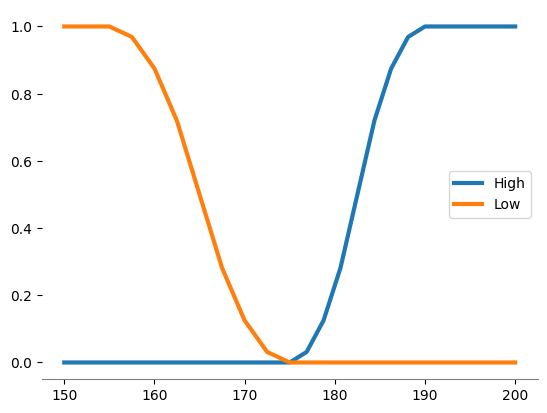

In [7]:
variables['score'].plot()

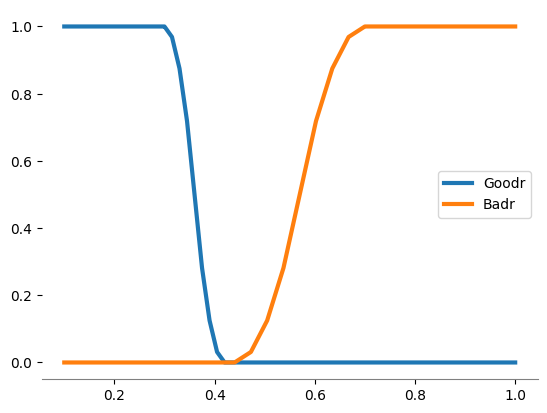

In [8]:
variables['ratio'].plot()

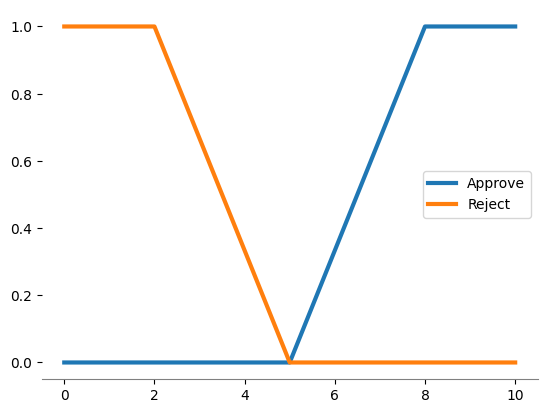

In [9]:
variables['decision'].plot()

# Fuzzy rules with certainty factors

It is possible to assign a certainty factor (cf) to each rule. If this value is not specified, it has assumed to be equal to 1.0. In addition, the threshold_cf is the minimum certainty factor required to consider the rule fired; this is, rules with a computed certainty factor below the threshold are not considering for computing the output of the system. The first rule has a certainty factor of 0.9, while the second rule has a certainty factor of 1.0 (by default).

In [10]:
rules = [
    FuzzyRule(
        cf=0.9,
        premise=[
            ("score", "High"),
            ("AND", "ratio", "Goodr"),
            ("AND", "credit", "Goodc"),
        ],
        consequence=[("decision", "Approve")],
    ),
    FuzzyRule(
        premise=[
            ("score", "Low"),
            ("AND", "ratio", "Badr"),
            ("OR", "credit", "Badc"),
        ],
        consequence=[("decision", "Reject")],
    )
]


# Facts with certainty factors

In addition, also it is possible to assign certainty factors to the facts. When a certainty factor not is specified by the user, it has a default value or 1.0. In the following code, the variables score, ratio, and credit have certainty factors of 0.9, 1.0, and 0.95 respectively. The conclusion is decision=7.59 with a certainty factor of 0.95.

Please note that decision here is different than above. This is because of the change in the membership functions!

In [11]:
from fuzzy_expert.inference import DecompositionalInference

model = DecompositionalInference(
    and_operator="min",
    or_operator="max",
    implication_operator="Rc",
    composition_operator="max-min",
    production_link="max",
    defuzzification_operator="cog",
)

model(
    variables=variables,
    rules=rules,
    score=(190, 0.9),
    ratio=(0.39, 1.0),
    credit=(1.5, 0.95),
)


({'decision': 7.5936936936936865}, 0.95)

# Fuzzy Inference System in MATLAB

MATLAB's Fuzzy Logic Toolbox provides Mamdani and Sugeno fuzzy processing. Here are the advantages:

Mamdani:

   - Intuitive

   - Well-suited to human input

   - More interpretable rule base

   - Have widespread acceptance

Sugeno:

   - Computationally efficient

   - Work well with linear techniques, such as PID control

   - Work well with optimization and adaptive techniques

   - Guarantee output surface continuity

   - Well-suited to mathematical analysis



## Installing necessary MATLAB modules for Python

In [ ]:
!pip install matlab --user
!pip install matlabengine --user

## Run above cell twice to see the correct path for your machine!

Then you can set the correct path in below cell.

In [13]:
!setx PATH "%PATH%;c:\users\exx520\appdata\roaming\python\python37\site-packages"


SUCCESS: Specified value was saved.


## Before continuing, please restart the kernel from the upper menu "Kernel>Restart"

In [ ]:
import matlab.engine

In [ ]:
eng = matlab.engine.start_matlab()

In [ ]:
tf = eng.isprime(37)
print(tf)